# Prepare test simulation results for unit testing
- Run using version cNMF 1.6.0

In [1]:
import pandas as pd
import numpy as np
from cnmf import cNMF


## Download the example data from the web

In [2]:
! wget -O ./example_simulated_data.tar.gz https://storage.googleapis.com/sabeti-public/dkotliar/cNMF/example_data_20191024.tar.gz
! tar -zxvf ./example_simulated_data.tar.gz && rm ./example_simulated_data.tar.gz

--2025-03-01 23:34:20--  https://storage.googleapis.com/sabeti-public/dkotliar/cNMF/example_data_20191024.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.65.251, 142.251.32.123, 142.250.176.219, ...
connected. to storage.googleapis.com (storage.googleapis.com)|142.250.65.251|:443... 
HTTP request sent, awaiting response... 200 OK
Length: 8115726 (7.7M) [application/gzip]
Saving to: ‘./example_simulated_data.tar.gz’

./example_simulated 100%[===================>]   7.74M  25.4MB/s    in 0.3s    

2025-03-01 23:34:20 (25.4 MB/s) - ‘./example_simulated_data.tar.gz’ saved [8115726/8115726]

x ./simulated_example_data/counts.npz
x ./simulated_example_data/filtered_counts.txt
x ./simulated_example_data/groundtruth_cellparams.txt
x ./simulated_example_data/groundtruth_geneparams.txt
x ./simulated_example_data/tsne.txt


In [3]:
numiter=15 ## Set this to a larger value for real data. We set this to a low value here for illustration
numworkers=1 ## Set this to a larger value and use the parallel code cells to try out parallelization
numhvgenes=1000 ## Number of over-dispersed genes to use for running the factorizations
K = np.arange(5,8)

## Results will be saved to [output_directory]/[run_name] which in this example is simulated_example_data/example_cNMF
output_directory = './simulated_example_data'
run_name = 'example_cNMF'

countfn = './simulated_example_data/filtered_counts.txt'
seed = 14

In [4]:
cnmf_obj = cNMF(output_dir=output_directory, name=run_name)

In [5]:
cnmf_obj.prepare(counts_fn=countfn, components=K, n_iter=numiter, seed=seed, num_highvar_genes=numhvgenes)

/Users/dkotliar/mambaforge/envs/test_cnmf/lib/python3.10/site-packages/scanpy/preprocessing/_scale.py:317: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [6]:
cnmf_obj.factorize()

[Worker 0]. Starting task 0.
[Worker 0]. Starting task 1.
[Worker 0]. Starting task 2.
[Worker 0]. Starting task 3.
[Worker 0]. Starting task 4.
[Worker 0]. Starting task 5.
[Worker 0]. Starting task 6.
[Worker 0]. Starting task 7.
[Worker 0]. Starting task 8.
[Worker 0]. Starting task 9.
[Worker 0]. Starting task 10.
[Worker 0]. Starting task 11.
[Worker 0]. Starting task 12.
[Worker 0]. Starting task 13.
[Worker 0]. Starting task 14.
[Worker 0]. Starting task 15.
[Worker 0]. Starting task 16.
[Worker 0]. Starting task 17.
[Worker 0]. Starting task 18.
[Worker 0]. Starting task 19.
[Worker 0]. Starting task 20.
[Worker 0]. Starting task 21.
[Worker 0]. Starting task 22.
[Worker 0]. Starting task 23.
[Worker 0]. Starting task 24.
[Worker 0]. Starting task 25.
[Worker 0]. Starting task 26.
[Worker 0]. Starting task 27.
[Worker 0]. Starting task 28.
[Worker 0]. Starting task 29.
[Worker 0]. Starting task 30.
[Worker 0]. Starting task 31.
[Worker 0]. Starting task 32.
[Worker 0]. Starting

In [7]:
cnmf_obj.combine()

Combining factorizations for k=5.
Combining factorizations for k=6.
Combining factorizations for k=7.


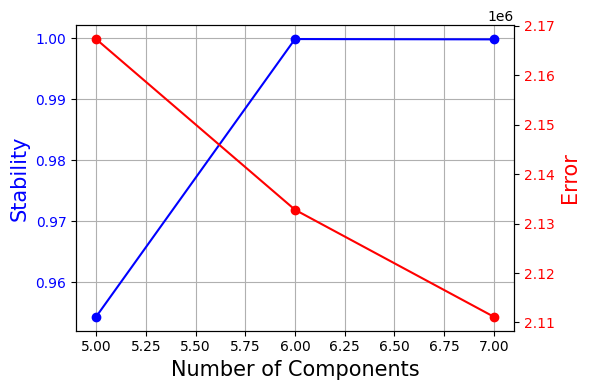

In [8]:
cnmf_obj.k_selection_plot()

In [9]:
## Setting density_threshold to 2.0 avoids any filtering
cnmf_obj.consensus(k=7, density_threshold=0.1, show_clustering=False)

/Users/dkotliar/mambaforge/envs/test_cnmf/lib/python3.10/site-packages/scanpy/preprocessing/_scale.py:317: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [10]:
! ls simulated_example_data/example_cNMF

cnmf_tmp
example_cNMF.gene_spectra_score.k_7.dt_0_1.txt
example_cNMF.gene_spectra_tpm.k_7.dt_0_1.txt
example_cNMF.k_selection.png
example_cNMF.k_selection_stats.df.npz
example_cNMF.overdispersed_genes.txt
example_cNMF.spectra.k_7.dt_0_1.consensus.txt
example_cNMF.starcat_spectra.k_7.dt_0_1.txt
example_cNMF.usages.k_7.dt_0_1.consensus.txt


In [11]:
! ls simulated_example_data

counts.npz                 groundtruth_cellparams.txt
example_cNMF               groundtruth_geneparams.txt
filtered_counts.txt        tsne.txt


In [12]:
! rm ./simulated_example_data/groundtruth_cellparams.txt ./simulated_example_data/groundtruth_geneparams.txt ./simulated_example_data/tsne.txt

In [13]:
! tar -czvf example_sim_results_20250301.tar.gz ./simulated_example_data/*

a ./simulated_example_data/counts.npz
a ./simulated_example_data/example_cNMF
a ./simulated_example_data/example_cNMF/example_cNMF.starcat_spectra.k_7.dt_0_1.txt
a ./simulated_example_data/example_cNMF/example_cNMF.usages.k_7.dt_0_1.consensus.txt
a ./simulated_example_data/example_cNMF/example_cNMF.k_selection.png
a ./simulated_example_data/example_cNMF/example_cNMF.overdispersed_genes.txt
a ./simulated_example_data/example_cNMF/example_cNMF.gene_spectra_tpm.k_7.dt_0_1.txt
a ./simulated_example_data/example_cNMF/example_cNMF.k_selection_stats.df.npz
a ./simulated_example_data/example_cNMF/cnmf_tmp
a ./simulated_example_data/example_cNMF/example_cNMF.gene_spectra_score.k_7.dt_0_1.txt
a ./simulated_example_data/example_cNMF/example_cNMF.spectra.k_7.dt_0_1.consensus.txt
a ./simulated_example_data/example_cNMF/cnmf_tmp/example_cNMF.spectra.k_6.iter_5.df.npz
a ./simulated_example_data/example_cNMF/cnmf_tmp/example_cNMF.spectra.k_5.iter_7.df.npz
a ./simulated_example_data/example_cNMF/cnmf_t